In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import os

In [116]:
data = pd.read_csv('../data/uber-raw-data-janjune-15.csv')

In [117]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


### Columns explamation:
    Dispatching_base_num : The TLC base company code of the base that dispatched the Uber
    Pickup_date : The date and time of the Uber pickup
    Affiliated_base_num : The TLC base company code affiliated with the Uber pickup
    locationID : The pickup location ID affiliated with the Uber pickup

Lets firstly see what we can conclude from pickup date and time

In [118]:
data['Date/Time'] = pd.to_datetime(data['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [119]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00
...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08 15:43:00
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08 15:43:00
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08 15:43:00
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00


In [120]:
data['Hour'] = data['Date/Time'].dt.hour
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day
data['DayOfWeek'] = data['Date/Time'].dt.day_of_week

In [121]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,5,17,6
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,5,17,6
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,5,17,6
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,5,17,6
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,5,17,6
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08 15:43:00,15,5,8,4
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08 15:43:00,15,5,8,4
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08 15:43:00,15,5,8,4
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00,15,5,8,4


In [122]:
np.unique(data['Month'])

array([1, 2, 3, 4, 5, 6])

In [123]:
months_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'Jun'
}

In [124]:
data.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,5,17,6
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,5,17,6
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,5,17,6
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,5,17,6
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,5,17,6


In [125]:
data['Month'] = data['Month'].map(months_map)

In [126]:
data.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,May,17,6
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,May,17,6
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,May,17,6
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,6
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,May,17,6


In [127]:
np.unique(data['Month'])

array(['April', 'Feb', 'Jan', 'Jun', 'March', 'May'], dtype=object)

In [128]:
# Count the number of rows per month
month_counts = data['Month'].value_counts().sort_index()

In [129]:
month_order = ['Jan', 'Feb', 'March', 'April', 'May', 'Jun']

# Convert 'Month' column to a categorical type with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


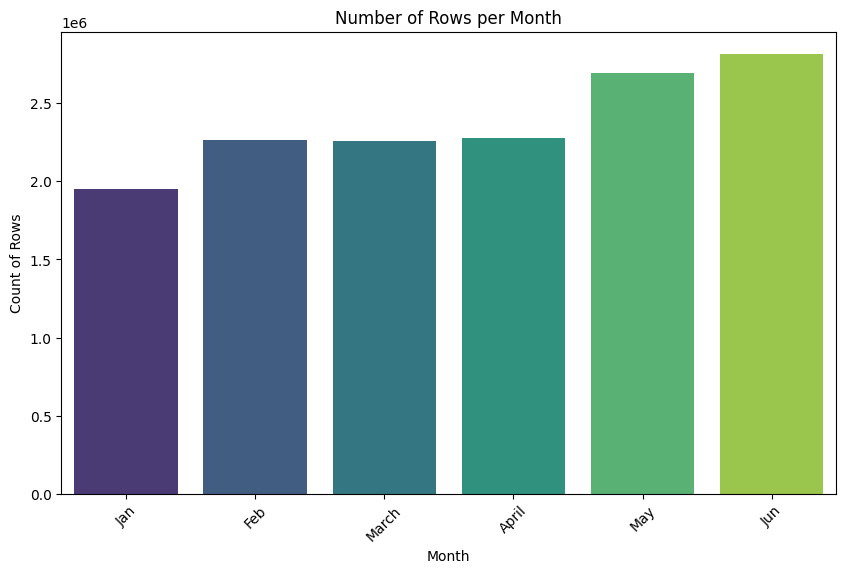

In [130]:
# Reset the index to use seaborn's plotting functions
month_counts_df = month_counts.reset_index()
month_counts_df.columns = ['Month', 'Count']

# Plot using seaborn with correct order
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Count', data=month_counts_df, order=month_order, palette='viridis')

# Set the title and labels
plt.title('Number of Rows per Month')
plt.xlabel('Month')
plt.ylabel('Count of Rows')
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Distribution of pickups between different hours in a day 

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


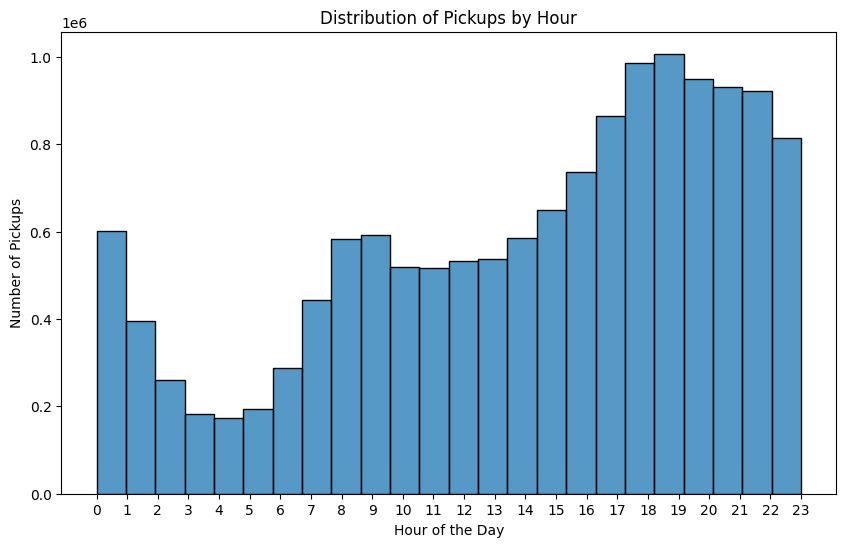

In [131]:
plt.figure(figsize=(10,6))
sns.histplot(data['Hour'], bins=24, kde=False)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

In [132]:
from matplotlib.lines import Line2D

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

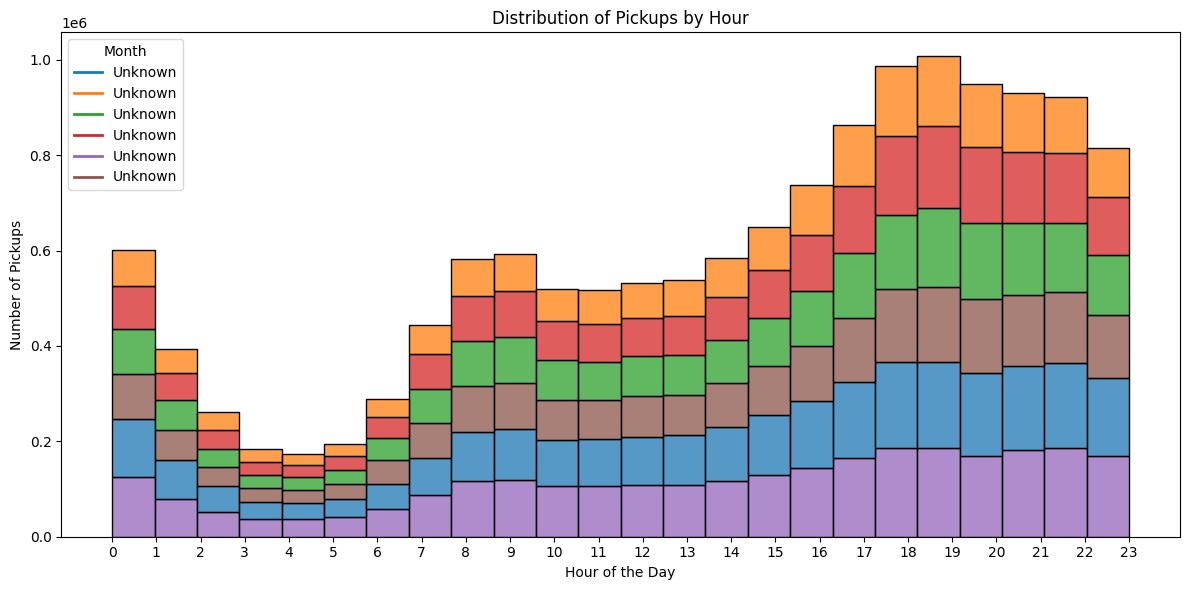

In [133]:
unique_months = data['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [months_map.get(month, 'Unknown') for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=data,x='Hour',hue='Month',multiple='stack', bins=24, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

Uber pickups tend to be maximum around 5-6 pm, when the work-day for most poeple ends. This trend can vary for weekends, thus separately checking for weekdays and weekends

For Weekends:

In [159]:
weekend=data[(data['DayOfWeek']=='Sunday') | (data['DayOfWeek']=='Saturday')]

In [160]:
weekend

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,May,17,Saturday
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,May,17,Saturday
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,May,17,Saturday
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,Saturday
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,May,17,Saturday
...,...,...,...,...,...,...,...,...,...
14239253,B02765,2015-01-04 13:35:16,B02682,249,2015-01-04 13:35:16,13,Jan,4,Saturday
14239254,B02765,2015-01-04 01:47:41,B02764,114,2015-01-04 01:47:41,1,Jan,4,Saturday
14239255,B02765,2015-01-04 19:27:16,B02646,224,2015-01-04 19:27:16,19,Jan,4,Saturday
14239256,B02765,2015-01-04 16:50:50,B00477,25,2015-01-04 16:50:50,16,Jan,4,Saturday


In [161]:
weekend = weekend.groupby('Hour').count()

In [162]:
weekend

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Month,Day,DayOfWeek
Hour,,,,,,,,
0,207009,207009,204647,207009,207009,207009,207009,207009
1,153703,153703,151974,153703,153703,153703,153703,153703
2,104355,104355,103100,104355,104355,104355,104355,104355
3,74418,74418,73553,74418,74418,74418,74418,74418
4,61157,61157,60498,61157,61157,61157,61157,61157
5,56541,56541,55968,56541,56541,56541,56541,56541
6,72430,72430,71661,72430,72430,72430,72430,72430
7,99806,99806,98716,99806,99806,99806,99806,99806
8,131679,131679,130164,131679,131679,131679,131679,131679


In [164]:
weekend = pd.DataFrame(weekend['Day'])
weekend.columns = ['Frequency']

In [165]:
weekend

,Frequency
Hour,
0,207009
1,153703
2,104355
3,74418
4,61157
5,56541
6,72430
7,99806
8,131679


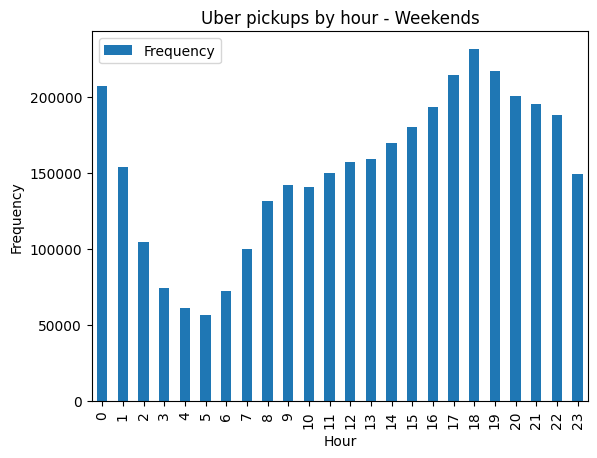

In [169]:
weekend.plot.bar()
plt.ylabel('Frequency')
plt.title('Uber pickups by hour - Weekends')
plt.show()

For Weekdays:


In [167]:
weekday=data[(data['DayOfWeek']!='Sunday') & (data['DayOfWeek']!='Saturday')]

In [168]:
weekday=weekday.groupby('Hour').count()
weekday=pd.DataFrame(weekday['Day'])
weekday.columns=['Frequency']

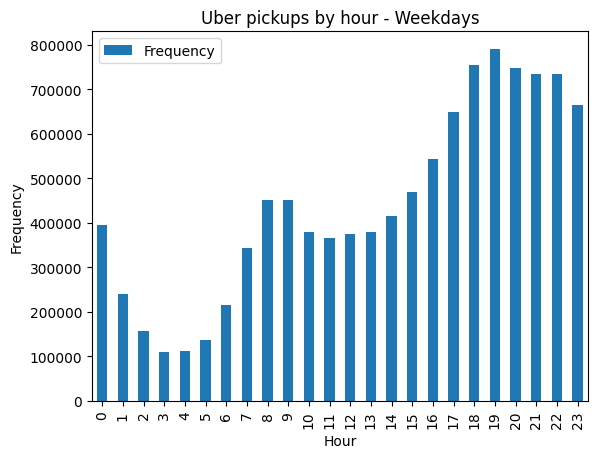

In [171]:
weekday.plot.bar()
plt.ylabel('Frequency')
plt.title('Uber pickups by hour - Weekdays')
plt.show()

### Distribution of data per days of a month

As we already saw how pickups are distributed for different hours of a day, it could also be interesting to see distribution within days in one month. 

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


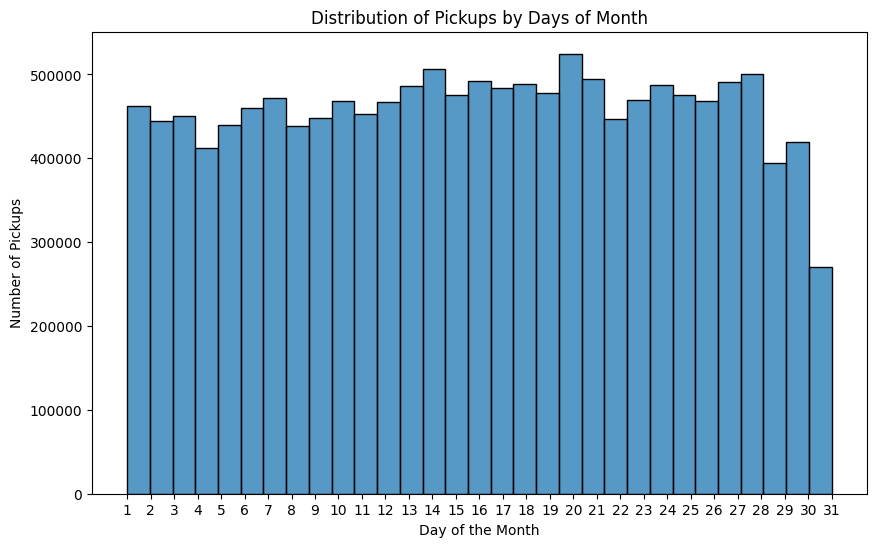

In [134]:
plt.figure(figsize=(10,6))
sns.histplot(data['Day'], bins=31, kde=False)
plt.title('Distribution of Pickups by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.show()

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

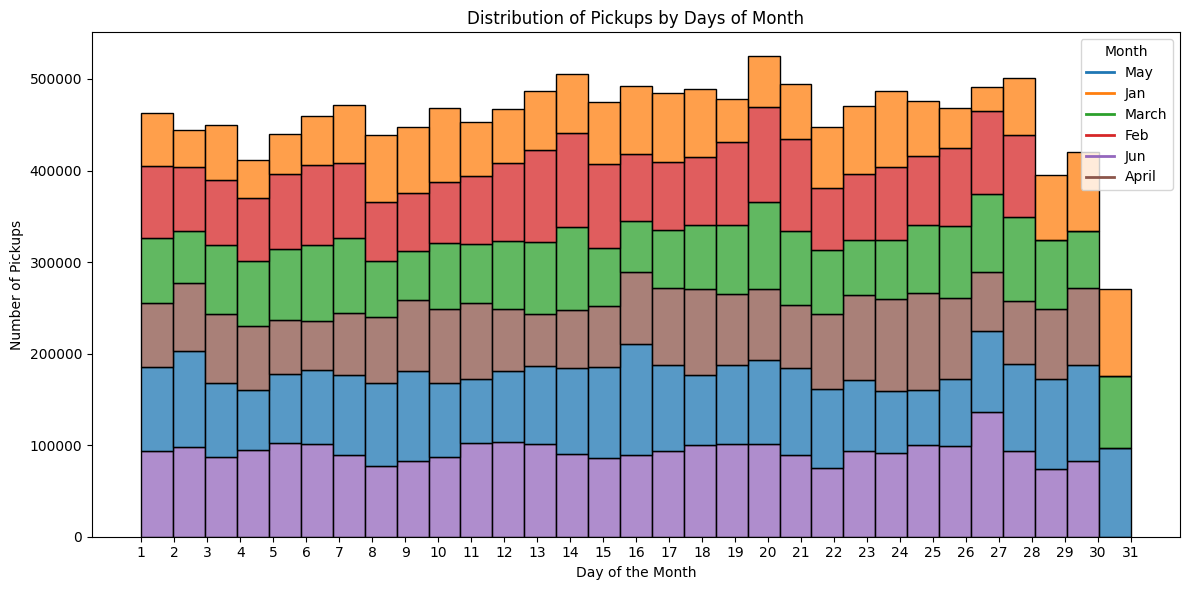

In [135]:
unique_months = data['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [month for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=data,x='Day',hue='Month',multiple='stack', bins=31, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

### Distribution of pickups within days of week

In [136]:
np.unique(data['DayOfWeek'])

array([0, 1, 2, 3, 4, 5, 6])

In [137]:
np.unique(data['Month'])

array(['April', 'Feb', 'Jan', 'Jun', 'March', 'May'], dtype=object)

In [138]:
#months_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
days_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

#df_apr_sep_2014['Month'] = df_apr_sep_2014['Month'].map(months_map)
data['DayOfWeek'] = data['DayOfWeek'].map(days_map)

In [139]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,May,17,Saturday
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,May,17,Saturday
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,May,17,Saturday
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,Saturday
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,May,17,Saturday
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08 15:43:00,15,May,8,Thursday
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08 15:43:00,15,May,8,Thursday
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08 15:43:00,15,May,8,Thursday
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00,15,May,8,Thursday


In [140]:
data_agg = data.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')

C:\Users\MARKO\AppData\Local\Temp\ipykernel_11664\196324485.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = data.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')


In [141]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data_agg['DayOfWeek'] = pd.Categorical(data_agg['DayOfWeek'], categories=days_order, ordered=True)

In [142]:
data_agg

,Month,DayOfWeek,count
0,Jan,Friday,392900
1,Jan,Monday,200125
2,Jan,Saturday,234599
3,Jan,Sunday,194004
4,Jan,Thursday,345532
5,Jan,Tuesday,250109
6,Jan,Wednesday,336532
7,Feb,Friday,375296
8,Feb,Monday,292470
9,Feb,Saturday,302083


C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


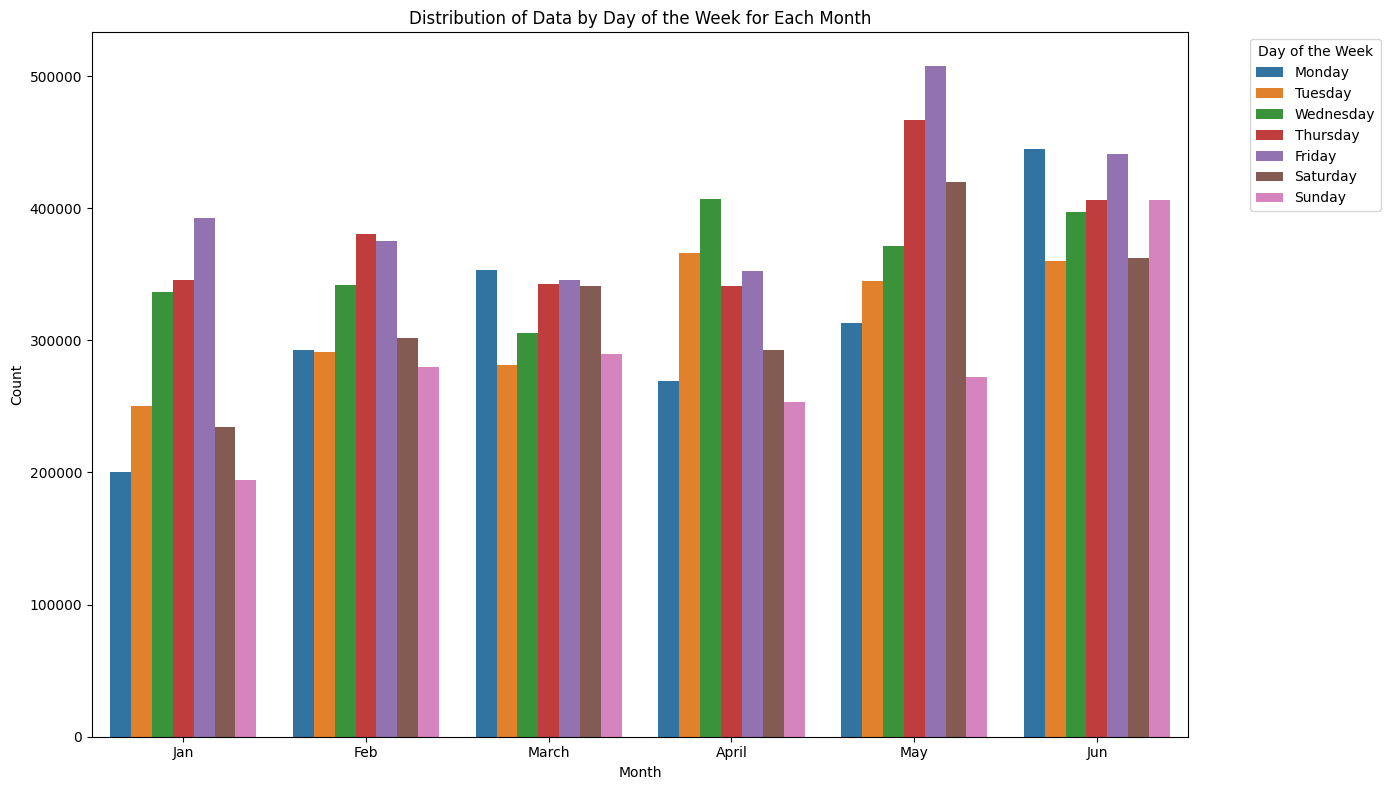

In [143]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg, x='Month', y='count', hue='DayOfWeek', hue_order=days_order, palette='tab10')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Data by Day of the Week for Each Month')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

In [152]:
week_day=pd.DataFrame(data['DayOfWeek'].value_counts())
week_day

,count
DayOfWeek,
Friday,2414563
Thursday,2282571
Wednesday,2159598
Saturday,1952782
Tuesday,1893811
Monday,1872902
Sunday,1694252


In [153]:
week_day['day_type'] = ['wd','wd','wd','we','wd','wd','we']

In [154]:
week_day

,count,day_type
DayOfWeek,,
Friday,2414563,wd
Thursday,2282571,wd
Wednesday,2159598,wd
Saturday,1952782,we
Tuesday,1893811,wd
Monday,1872902,wd
Sunday,1694252,we


In [155]:
pie=week_day.groupby(['day_type']).sum()
pie.iloc[0,0]=pie.iloc[0,0]/5
pie.iloc[1,0]=pie.iloc[1,0]/2
pie

,count
day_type,
wd,2124689
we,1823517


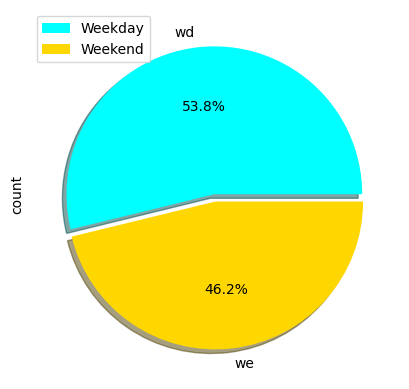

In [156]:
explode=[0,0.05]
colors=['cyan','gold']
labels=['Weekday','Weekend']
pie.plot.pie(autopct = '%1.1f%%',shadow=True,subplots=True,
        colors=colors,explode=explode)
plt.legend(labels=labels)
plt.show()